In [2]:
import pandas as pd
import json
import string
from collections import defaultdict 

In [3]:
in_data = None
with open('F:/HKU Sem2 19-20/11keywords_list/scope_individual/aapl_news.csv', 'r', encoding="utf8") as infile:
    in_data = infile.read().split('\n')
    
title_data = []
summary_data = []
for article in in_data:
    fields = article.strip().rsplit(',',5)
    #print(fields[0])
    fields[0:1] = fields[0].split(',', 1) 
    #print(fields[0:1])
    fields[0:1] = map(str.strip, fields[0:1]) 
    fields = fields[0:7]
    # print(fields)
    #print(len(fields))
    if len(fields) < 4:
        continue
    title_data += [(fields[0], fields[2], fields[3])]
    summary_data += [(fields[0], fields[2], fields[3],fields[4])]

#print(summary_data)
number_to_month1 = {"01": "1", "02":"2", "03":"3", "04":"4", "05":"5", "06": "6", "07":"7", "08":"8", "09":"9", "10":"10", "11":"11", "12":"12"}
number_to_day1 = {"01": "1", "02":"2", "03":"3", "04":"4", "05":"5", "06": "6", "07":"7", "08":"8", "09":"9", "10":"10", "11":"11", "12":"12","13":"13","14":"14","15":"15","16":"16","17":"17","18":"18","19":"19","20":"20",
                   "21":"21","22":"22","23":"23","24":"24","25":"25","26":"26","27":"27","28":"28","29":"29","30":"30","31":"31"}
########################## Date.format in news(20191108)-->stocks(2019/11/8)
def conv_num_to_string1(d):
    year = d[0:4]
    month = d[4:6]
    day = d[6:8]
    new = year[0:4] + "/" + number_to_month1[month] + "/" + number_to_day1[day]
    return new  


news_csv = pd.read_csv("F:/HKU Sem2 19-20/11keywords_list/scope_individual/aapl_news.csv", error_bad_lines=False, header = None, names = ["stock", "company", "date", "title", "summary", "type", "links"])
#stocks = ['GOOGL', 'INTC', 'AAPL', 'CSCO', 'AMD', 'QCOM', 'NVDA', 'AMZN', 'MSFT', 'IBM']
#stock_data = news_csv[news_csv["stock"] == 'GOOGL']
stock_price_csv = pd.read_csv("F:/HKU Sem2 19-20/11keywords_list/scope_individual/AAPL_2009-01-01_to_2020-02-01.csv")
apple_price_csv = pd.read_csv("F:/HKU Sem2 19-20/11keywords_list/scope_individual/AAPL_2009-01-01_to_2020-02-01.csv")

In [5]:
####################################### Add Label
import csv

total = []
day_lag = 1
#midweek_lag = 3
#week_lag = 7
#month_lag = 30
up_count = 0
down_count = 0
preserve_count = 0

titles = []
titles_up = []
titles_down = []
titles_preserve = []
titles_another = []


for t in summary_data:
    title = t[2].strip()
    summary = t[3].strip()
    title = ''.join(i for i in title if ord(i)<128)
    title = title.replace('  ', ' ')
    title = title.replace('\'s', '')
    summary = ''.join(i for i in summary if ord(i)<128)
    summary = summary.replace('  ', ' ')
    summary = summary.replace('\'s', '')
    for i in range(3):
        if '-' in title and (title[title.find('-') - 1].isupper() or 'UPDATE' in title):
            title = title[title.find('-') + 1:]
            #print(title)
        else:
            break
    
    #print(title[:100])
    title_another = title.translate(str.maketrans('','',string.punctuation))
    title_another = title_another + '.'
    title_another = title_another.lower()
    #title_another = title + '.'
    titles_another += [(t[0], t[1], title_another)]
    #if stock in stock_price_csv["Date"].values:
    #print(type(t[0]))
    #stock_data = news_csv[news_csv["stock"] == t[0]]
    #stock_price_csv = pd.read_csv("F:/HKU Sem2 19-20/2price_data/"+t[0]+"_2009-01-01_to_2020-02-01.csv")
    day = conv_num_to_string1(str(t[1]) ) 
    if day in stock_price_csv["Date"].values:
            row_index = stock_price_csv.index[stock_price_csv["Date"] == day].tolist()[0]
            # Why Sparse? case1: one-day stocks has multiple news on the same day(multiple the same index); 
            # Why Sparse? case2: have stock every day yet lack of news in some days(indexs are not continuous)  --> Sparse
            # row_index --> Dates that have both news and stocks 
            next_price_day = stock_price_csv.iloc[row_index - day_lag  ]
            #next_price_midweek = stock_price_csv.iloc[row_index - midweek_lag  ]
            #next_price_week = stock_price_csv.iloc[row_index - week_lag  ]
            ###########可change to day_lag = 2,3,5,7,
            #print(next_price["Date"], google_price_csv.iloc[row_index]["Date"])  # 2020/1/31 2020/1/30   
            #print(next_price["Open"],next_price["Close"])
            #print(next_price["Open"],google_price_csv.iloc[row_index]["Open"])
            #diff = next_price["Close"] - next_price["Open"]
            diff_day = next_price_day["Close"] - apple_price_csv.iloc[row_index]["Close"]
            #diff_midweek = next_price_mideweek["Close"] - apple_price_csv.iloc[row_index]["Close"]
            #diff_week = next_price_week["Close"] - apple_price_csv.iloc[row_index]["Close"]
            #diff = (next_price["Open"] - apple_price_csv.iloc[row_index]["Open"])/(apple_price_csv.iloc[row_index]["Open"])
            #diff = float(diff1)/apple_price_csv.iloc[row_index]["Open"]
            #print(diff)
            #print(diff1)
            #print("############################")
            #with open('F:/HKU Sem2 19-20/11keywords_list/scope_individual/AAPL.csv', 'w',newline='') as csvfile:
            #    writer = csv.writer(csvfile)
            #   writer.writerow(["ticker",'date','titles','label'])
            if diff_day > 0.0:
                #titles += [[t[0], t[1], title,1]]  ########################  modify tuple to list
                #titles_up += [(t[0], t[1], title,summary,1)]
                titles_up += [[t[0], t[1], title,summary,1]]
                up_count += 1
            #elif diff < -0.041:
            #    titles_down += [[t[0], t[1], title,summary,-1]]
            #    down_count += 1
            else:
                #titles_down += [[t[0], t[1], title,summary,0]]   ########################  modify tuple to list
                titles_down += [[t[0], t[1], title,summary,0]]
                down_count += 1
print(up_count,down_count)   


3045 2927


In [23]:
with open('F:/HKU Sem2 19-20/12dictionary_setup/AAPL_up1.csv', 'w',newline='') as csvfile:
    writer = csv.writer(csvfile)
    #writer.writerow(["ticker",'date','titles','label'])
    for i in titles_up:
        #print(i)
        writer.writerow(map(lambda x: x,i))

with open('F:/HKU Sem2 19-20/12dictionary_setup/AAPL_down1.csv', 'w',newline='') as csvfile:
    writer = csv.writer(csvfile)
    #writer.writerow(["ticker",'date','titles','label'])
    for j in titles_down:
        #print(i)
        writer.writerow(map(lambda x: x,j))

In [260]:
dataset = pd.read_csv("F:/HKU Sem2 19-20/11keywords_list/scope_individual/AAPL.csv", error_bad_lines=False, header = None,names = ["ticker",'date','titles','label'])
#print("Old data frame length:", len(dataset))
dataset.drop_duplicates(inplace = True)
dataset.reset_index(drop=True, inplace=True)
#dataset
#print("New data frame length:",len(dataset))#, "\nNumber of rows with at least 1 NA value: ", (len(df)-len(df1)))
#dataset.dtype()

In [32]:
#up_dataset = dataset[dataset["label"]==1]
#up_dataset = pd.DataFrame(up_dataset)
up_dataset = pd.read_csv("F:/HKU Sem2 19-20/12dictionary_setup/AAPL_up1.csv", error_bad_lines=False, header = None,names = ["ticker",'date','titles','summary','label'])
print("Old data frame length:", len(up_dataset))
up_dataset.dropna(inplace = True)
up_dataset.drop_duplicates(inplace = True)
up_dataset.reset_index(drop=True, inplace=True)
#dataset
print("New data frame length:",len(up_dataset))#, "\nNumber of rows with at least 1 NA value: ", (len(df)-len(df1)))
#dataset.dtype()
#up_dataset
up_dataset.to_csv("F:/HKU Sem2 19-20/12dictionary_setup/AAPL_up(no_NAN).csv",index=False)

Old data frame length: 3159
New data frame length: 3047


In [5]:
down_dataset = pd.read_csv("F:/HKU Sem2 19-20/12dictionary_setup/AAPL_down.csv", error_bad_lines=False, header = None,names = ["ticker",'date','titles','label'])
#print("Old data frame length:", len(down_dataset))
down_dataset.dropna(inplace = True)
down_dataset.drop_duplicates(inplace = True)
down_dataset.reset_index(drop=True, inplace=True)
#print("New data frame length:",len(down_dataset))

Old data frame length: 2927
New data frame length: 2369


In [6]:
# Fetch wordcount for each abstract
up_dataset['word_count'] = up_dataset['titles'].apply(lambda x: len(str(x).split(" ")))
up_dataset[['titles','word_count']].head()

,titles,word_count
0,Apple supplier Japan Display gets $920 million...,10
1,LG Display looks to a more positive 2020 on OL...,13
2,SK Hynix Q4 profit tumbles 95% hit by prolonge...,11
3,Apple supplier LG Display posts fourth quarter...,11
4,Apple redesigns mapping app for U.S. users,7


In [7]:
# Fetch wordcount for each abstract
down_dataset['word_count'] = down_dataset['titles'].apply(lambda x: len(str(x).split(" ")))
down_dataset[['titles','word_count']].head()

,titles,word_count
0,EU lawmakers with eye on Apple call for common...,11
1,CalTech wins $1.1 billion jury verdict in pate...,12
2,S&P 500 fades to end lower after Fed policy an...,10
3,Apple Boeing lift Wall Street as Fed stands pat,9
4,Apple Boeing lift Wall Street ahead of Fed dec...,9


In [8]:
##Descriptive statistics of word counts
up_dataset.word_count.describe()

count    2502.000000
mean        9.603517
std         1.980179
min         1.000000
25%         8.000000
50%        10.000000
75%        11.000000
max        20.000000
Name: word_count, dtype: float64

In [9]:
##Descriptive statistics of word counts
down_dataset.word_count.describe()

count    2369.000000
mean        9.601098
std         1.971935
min         3.000000
25%         8.000000
50%        10.000000
75%        11.000000
max        26.000000
Name: word_count, dtype: float64

In [10]:
##Descriptive statistics of word counts
#dataset.word_count.describe()

In [11]:
#Identify common words
#print(up_dataset['titles'][2160])
freq_up = pd.Series(' '.join(up_dataset['titles']).split()).value_counts()[:20]
freq_down = pd.Series(' '.join(down_dataset['titles']).split()).value_counts()[:20]
#freq_up
#freq_down

In [12]:
freq_up

Apple      1780
to          735
in          479
on          366
for         283
Wall        235
as          225
of          224
iPhone      218
U.S.        211
with        196
says        173
St          157
-           156
China       154
shares      129
new         124
up          112
after       112
Samsung     108
dtype: int64

In [13]:
freq_down

Apple      1625
to          676
in          474
on          381
for         262
Wall        229
iPhone      222
of          219
as          218
with        199
U.S.        172
-           154
St          153
says        151
Samsung     146
China       128
shares      111
after       111
new         106
patent      100
dtype: int64

In [14]:
#Identify uncommon words
freq1_up =  pd.Series(' '.join(up_dataset ['titles']).split()).value_counts()[-20:]
#freq1_up
freq1_down =  pd.Series(' '.join(down_dataset ['titles']).split()).value_counts()[-20:]
#freq1_down

In [17]:
# Libraries for text preprocessing
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import regexp_tokenize

##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))

In [18]:
up_corpus = []
down_corpus = []

for i in range(0, len(up_dataset)):
    # print(dataset['titles'][i].type()) ----str
    #Remove punctuations
    #text = re.sub('[^a-zA-Z]', ' ', dataset['titles'][i])
    
    #Convert to lowercase
    #text = (dataset['titles'][i]).lower()
    
    #######################################Changes in S&P 500
    pattern = r"""(?x)                  
                     (?:[A-Z]\.)+          
                     |\$?\d+(?:\.\d+)?%?    
                     |\w+(?:[-&']\w+)*     
                     |\.\.\.              
                    |(?:[.,;"'?():-_`])     
              """                        
    title1 = regexp_tokenize(up_dataset['titles'][i],pattern)  #list
    title_withlower = [word.lower() for word in title1]
    #print(title1)
    
    #remove tags
    #text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    #text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    #text = text.split()
    
    ##Stemming
    #ps=PorterStemmer()
    #Lemmatisation
    #lem = WordNetLemmatizer()
    #text = [lem.lemmatize(word) for word in text if not word in stop_words] 
    text = [(word) for word in title1 if not word in stop_words] 
    #text_withlower = [(word) for word in title_withlower if not word in stop_words]
    text = " ".join(text)
    #text_withlower = " ".join(text_withlower)
    up_corpus.append(text)
    #corpus.append(text_withlower)

    
for j in range(0,len(down_dataset)):
    pattern1 = r"""(?x)                  
                     (?:[A-Z]\.)+          
                     |\$?\d+(?:\.\d+)?%?    
                     |\w+(?:[-&']\w+)*     
                     |\.\.\.              
                    |(?:[.,;"'?():-_`])     
              """                        
    title2 = regexp_tokenize(down_dataset['titles'][j],pattern1)  #list
    title_withlower2 = [word.lower() for word in title2]
    text2 = [(word) for word in title2 if not word in stop_words] 
    #text_withlower = [(word) for word in title_withlower if not word in stop_words]
    text2 = " ".join(text2)
    #text_withlower = " ".join(text_withlower)
    down_corpus.append(text2)

In [19]:
print(up_corpus)

['Apple supplier Japan Display gets $920 million bailout Ichigo', 'LG Display looks positive 2020 OLED demand shares rise', 'SK Hynix Q4 profit tumbles 95% hit prolonged chip downturn', 'Apple supplier LG Display posts fourth quarterly loss row', 'Apple redesigns mapping app U.S. users', 'Apple iPhone strength back analysts say stay', 'Apple Boeing bolster Wall Street open', 'Futures gain Apple earnings take focus virus concerns', 'Foxconn says plans place meet production obligations virus outbreak', 'Asian stocks rise Apple drives tech gains virus worries ease', 'Apple iPhone back growth company braces coronavirus impact', 'Apple iPhone sales return growth pushing profits expectations', 'Wall Street rebounds China virus fears Apple soars', 'Apple leads Wall St rebound ahead results', 'Huawei snatched market share Apple local rivals China 2019', 'IN BRIEF : Jury tells Apple pay $85 million WiLAN patent retrial', 'Trump break bread Apple Cook CEOs : sources', "Taiwan calls China share '

In [20]:
print(down_corpus)

['EU lawmakers eye Apple call common mobile charger', 'CalTech wins $1.1 billion jury verdict patent case Apple Broadcom', 'S&P 500 fades end lower Fed policy announcement', 'Apple Boeing lift Wall Street Fed stands pat', 'Apple Boeing lift Wall Street ahead Fed decision', 'Wall St edges higher Apple Boeing strength ; Fed focus', 'Apple sparks Wall Street bounce ahead results', 'Services spotlight Apple stock market value hits $1.4 trillion', 'Coronavirus outbreak may disrupt Apple iPhone production ramp plans : Nikkei', 'Broadcom supply wireless components Apple', 'Google finds security flaws Apple web browser : FT', 'Google finds security flaws Apple web browser FT', 'Amazon Music crosses 55 million subscribers globally trails Apple Music', 'Exclusive : Apple dropped plan encrypting backups FBI complained sources', 'Apple lawsuit tests employee plan rival startup payroll', "Break big tech ' monopoly ' smaller rivals tell Congress hearing", 'Apple rejects claims provide assistance Pen

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X_up = cv.fit_transform(up_corpus)
X_down = cv.fit_transform(down_corpus)
#X.shape  ###(

In [22]:
list(cv.vocabulary_.keys())[:10]

['eu',
 'eye',
 'apple',
 'call',
 'common',
 'mobile',
 'apple call',
 'mobile charger',
 'wins',
 'billion']

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer1=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer1.fit(X_up)
tfidf_transformer2=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer2.fit(X_down)
# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
for doc1 in up_corpus:
    tf_idf_vector1 = tfidf_transformer1.transform(cv.transform([doc1]))
    #doc=corpus[532]

#generate tf-idf for the given document
#tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

for doc2 in down_corpus:
    tf_idf_vector2 = tfidf_transformer2.transform(cv.transform([doc2]))

In [24]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix

def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

#sort the tf-idf vectors by descending order of scores
sorted_items_up=sort_coo(tf_idf_vector1.tocoo())
sorted_items_down=sort_coo(tf_idf_vector2.tocoo())
#extract only the top n; n here is 10
up_keywords=extract_topn_from_vector(feature_names,sorted_items_up,5)
down_keywords=extract_topn_from_vector(feature_names,sorted_items_down,5)
 
# now print the results
#print("\nAbstract:")
#print(doc)
#print("\nKeywords:")
#for k in keywords:
#    print(k,keywords[k])

In [25]:
results_up = []
results_down = []


for doc1 in up_corpus:
    #print(doc)
    
    tf_idf_vector1=tfidf_transformer1.transform(cv.transform([doc1]))
    #sort the tf-idf vectors by descending order of scores
    sorted_items_up=sort_coo(tf_idf_vector1.tocoo())
    #extract only the top n; n here is 10
    up_keywords=extract_topn_from_vector(feature_names,sorted_items_up,5)
    #print(doc)
    #print(keywords)
    results_up.append(up_keywords)
    #print("\nAbstract: "+doc)
    #print("Keywords:")
    #for k in keywords:
    #    print(k,keywords[k])


for doc2 in down_corpus:
    #print(doc)
    
    tf_idf_vector2=tfidf_transformer2.transform(cv.transform([doc2]))
    #sort the tf-idf vectors by descending order of scores
    sorted_items_down=sort_coo(tf_idf_vector2.tocoo())
    #extract only the top n; n here is 10
    down_keywords=extract_topn_from_vector(feature_names,sorted_items_down,5)
    #print(doc)
    #print(keywords)
    results_down.append(down_keywords)


In [27]:
list_of_tuples_up = list(zip(up_corpus, results_up)) 
dfss_up = pd.DataFrame(list_of_tuples_up, columns = ['doc', 'up_keywords'])
#dfss_up.to_csv('F:/HKU Sem2 19-20/11keywords_list/AAPL_up_keywords.csv',index=False)
dfss_up

,doc,up_keywords
0,Apple supplier Japan Display gets $920 million...,"{'supplier': 0.325, 'supplier japan': 0.309, '..."
1,LG Display looks positive 2020 OLED demand sha...,"{'positive': 0.339, 'oled': 0.339, 'shares ris..."
2,SK Hynix Q4 profit tumbles 95% hit prolonged c...,"{'tumbles': 0.318, 'q4 profit': 0.318, 'q4': 0..."
3,Apple supplier LG Display posts fourth quarter...,"{'supplier lg display': 0.29, 'supplier lg': 0..."
4,Apple redesigns mapping app U.S. users,"{'users': 0.654, 'app': 0.58, 'apple': 0.486}"
5,Apple iPhone strength back analysts say stay,"{'apple iphone': 0.454, 'analysts': 0.454, 'ba..."
6,Apple Boeing bolster Wall Street open,"{'wall street': 0.412, 'wall': 0.412, 'street'..."
7,Futures gain Apple earnings take focus virus c...,"{'take': 0.367, 'gain': 0.367, 'futures': 0.36..."
8,Foxconn says plans place meet production oblig...,"{'production': 0.366, 'plans': 0.366, 'place':..."
9,Asian stocks rise Apple drives tech gains viru...,"{'worries': 0.288, 'tech gains': 0.288, 'stock..."


In [28]:
list_of_tuples_down = list(zip(down_corpus, results_down)) 
dfss_down = pd.DataFrame(list_of_tuples_down, columns = ['doc', 'down_keywords'])
#dfss_down.to_csv('F:/HKU Sem2 19-20/11keywords_list/AAPL_down_keywords.csv',index=False)
dfss_down

,doc,down_keywords
0,EU lawmakers eye Apple call common mobile charger,"{'mobile charger': 0.466, 'common': 0.426, 'ap..."
1,CalTech wins $1.1 billion jury verdict patent ...,"{'patent case apple': 0.364, 'broadcom': 0.364..."
2,S&P 500 fades end lower Fed policy announcement,"{'policy announcement': 0.392, 'fed policy': 0..."
3,Apple Boeing lift Wall Street Fed stands pat,"{'pat': 0.351, 'boeing lift wall': 0.321, 'boe..."
4,Apple Boeing lift Wall Street ahead Fed decision,"{'wall street ahead': 0.265, 'street ahead fed..."
5,Wall St edges higher Apple Boeing strength ; F...,"{'st edges higher': 0.341, 'edges higher': 0.3..."
6,Apple sparks Wall Street bounce ahead results,"{'sparks': 0.467, 'ahead results': 0.467, 'bou..."
7,Services spotlight Apple stock market value hi...,"{'value hits': 0.309, 'market value hits': 0.3..."
8,Coronavirus outbreak may disrupt Apple iPhone ...,"{'ramp plans nikkei': 0.29, 'ramp plans': 0.29..."
9,Broadcom supply wireless components Apple,"{'broadcom': 0.526, 'components': 0.515, 'wire..."


In [29]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [336]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))

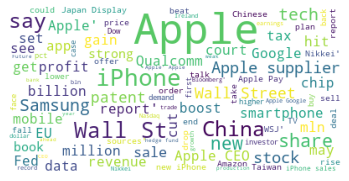

In [30]:
#matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(up_corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
#fig.savefig("word1.png", dpi=900)

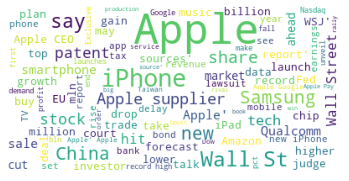

In [31]:
#matplotlib inline
wordcloud1 = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(down_corpus))
print(wordcloud1)
fig = plt.figure(1)
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()
#fig.savefig("word1.png", dpi=900)

In [ ]:
import seaborn as sns

[Text(0, 0, 'apple'),
 Text(0, 0, 'wall'),
 Text(0, 0, 'iphone'),
 Text(0, 0, 'says'),
 Text(0, 0, 'st'),
 Text(0, 0, 'china'),
 Text(0, 0, 'shares'),
 Text(0, 0, 'new'),
 Text(0, 0, 'samsung'),
 Text(0, 0, 'stocks'),
 Text(0, 0, 'tech'),
 Text(0, 0, 'sales'),
 Text(0, 0, 'patent'),
 Text(0, 0, 'court'),
 Text(0, 0, 'street'),
 Text(0, 0, 'ceo'),
 Text(0, 0, 'google'),
 Text(0, 0, 'tax'),
 Text(0, 0, 'supplier'),
 Text(0, 0, 'data')]

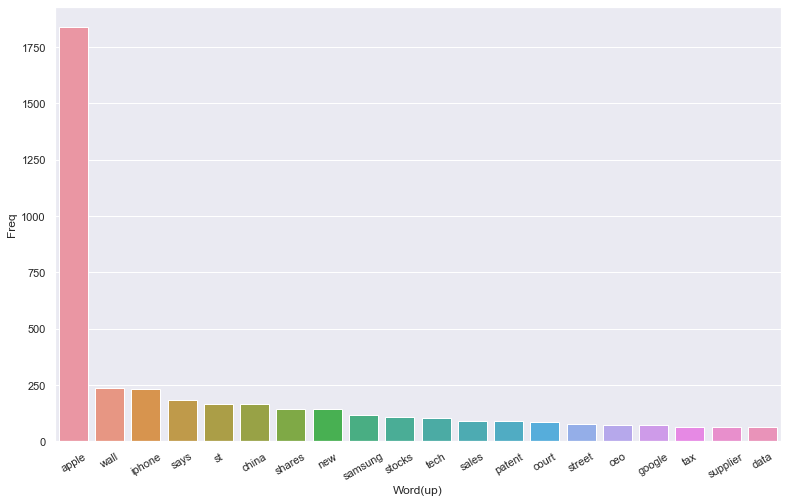

In [32]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

#Convert most freq words to dataframe for plotting bar plot
top_words_up = get_top_n_words(up_corpus, n=20)  #down_corpus
top_df_up = pd.DataFrame(top_words_up)
top_df_up.columns=["Word(up)", "Freq"]
#top_words_down = get_top_n_words(down_corpus, n=20) 
#top_df_down = pd.DataFrame(top_words_down)
#top_df_down.columns=["Word(down)", "Freq"]
#Barplot of most freq words

sns.set(rc={'figure.figsize':(13,8)})
g_up = sns.barplot(x="Word(up)", y="Freq", data=top_df_up)
g_up.set_xticklabels(g_up.get_xticklabels(), rotation=30)
#g_down = sns.barplot(x="Word(down)", y="Freq", data=top_df_down)
#g_down.set_xticklabels(g_down.get_xticklabels(), rotation=30)

        Bi-gram(up)  Freq
0           wall st   164
1       wall street    72
2    apple supplier    51
3         apple ceo    43
4      apple shares    40
5     japan display    35
6         apple pay    35
7        says apple    35
8   apple suppliers    35
9      iphone sales    30
10     apple google    27
11       apple says    25
12     apple iphone    24
13      apple watch    24
14    taiwan stocks    23
15       apple cook    22
16       new iphone    22
17    apple samsung    22
18          hon hai    18
19      hedge funds    17


[Text(0, 0, 'wall st'),
 Text(0, 0, 'wall street'),
 Text(0, 0, 'apple supplier'),
 Text(0, 0, 'apple ceo'),
 Text(0, 0, 'apple shares'),
 Text(0, 0, 'japan display'),
 Text(0, 0, 'apple pay'),
 Text(0, 0, 'says apple'),
 Text(0, 0, 'apple suppliers'),
 Text(0, 0, 'iphone sales'),
 Text(0, 0, 'apple google'),
 Text(0, 0, 'apple says'),
 Text(0, 0, 'apple iphone'),
 Text(0, 0, 'apple watch'),
 Text(0, 0, 'taiwan stocks'),
 Text(0, 0, 'apple cook'),
 Text(0, 0, 'new iphone'),
 Text(0, 0, 'apple samsung'),
 Text(0, 0, 'hon hai'),
 Text(0, 0, 'hedge funds')]

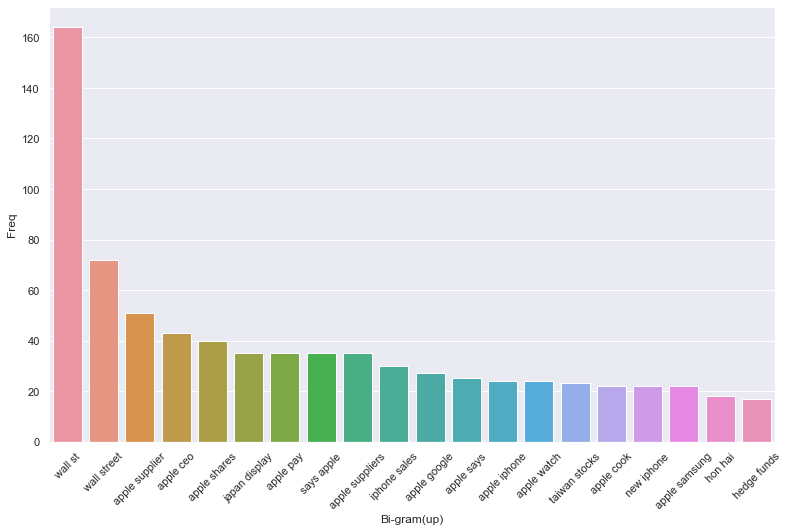

In [33]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top2_words_up = get_top_n2_words(up_corpus, n=20)
top2_df_up = pd.DataFrame(top2_words_up)
top2_df_up.columns=["Bi-gram(up)", "Freq"]
print(top2_df_up)
#Barplot of most freq Bi-grams

sns.set(rc={'figure.figsize':(13,8)})
h_up =sns.barplot(x="Bi-gram(up)", y="Freq", data=top2_df_up)
h_up.set_xticklabels(h_up.get_xticklabels(), rotation=45)

              Tri-gram(up)  Freq
0            wall st rises    15
1             wall st ends    14
2            wall st falls    13
3            wall st opens    12
4   supplier japan display     9
5     apple supplier japan     8
6        stocks rise apple     8
7           apple ceo cook     8
8            wall st slips     8
9       taiwan stocks rise     8
10          st opens lower     7
11             wall st set     7
12     apple hits trillion     7
13           wall st lower     7
14         top hedge funds     7
15         apple app store     6
16      india morning call     6
17     morning call global     6
18     call global markets     6
19      apple iphone sales     5


[Text(0, 0, 'wall st rises'),
 Text(0, 0, 'wall st ends'),
 Text(0, 0, 'wall st falls'),
 Text(0, 0, 'wall st opens'),
 Text(0, 0, 'supplier japan display'),
 Text(0, 0, 'apple supplier japan'),
 Text(0, 0, 'stocks rise apple'),
 Text(0, 0, 'apple ceo cook'),
 Text(0, 0, 'wall st slips'),
 Text(0, 0, 'taiwan stocks rise'),
 Text(0, 0, 'st opens lower'),
 Text(0, 0, 'wall st set'),
 Text(0, 0, 'apple hits trillion'),
 Text(0, 0, 'wall st lower'),
 Text(0, 0, 'top hedge funds'),
 Text(0, 0, 'apple app store'),
 Text(0, 0, 'india morning call'),
 Text(0, 0, 'morning call global'),
 Text(0, 0, 'call global markets'),
 Text(0, 0, 'apple iphone sales')]

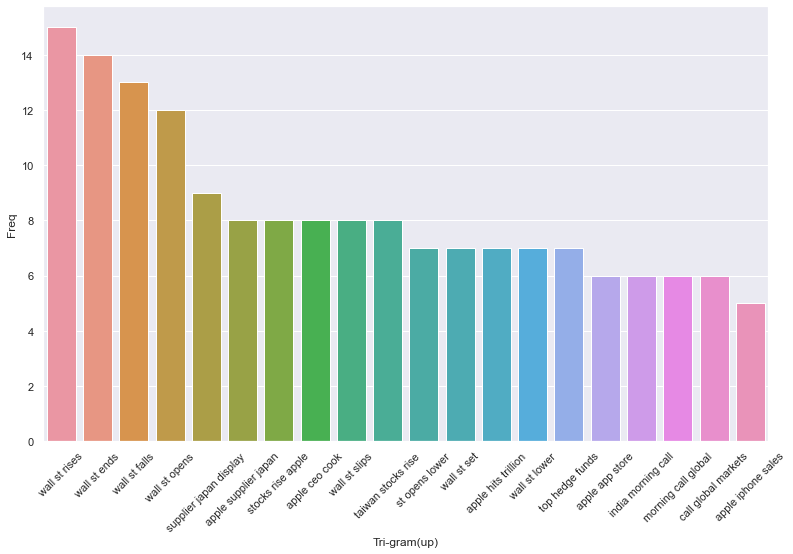

In [34]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]


top3_words_up = get_top_n3_words(up_corpus, n=20)
top3_df_up = pd.DataFrame(top3_words_up)
top3_df_up.columns=["Tri-gram(up)", "Freq"]
print(top3_df_up)

#Barplot of most freq Tri-grams
sns.set(rc={'figure.figsize':(13,8)})
j_up=sns.barplot(x="Tri-gram(up)", y="Freq", data=top3_df_up)
j_up.set_xticklabels(j_up.get_xticklabels(), rotation=45)

In [35]:
for x in up_corpus:
    print(x)

Apple supplier Japan Display gets $920 million bailout Ichigo
LG Display looks positive 2020 OLED demand shares rise
SK Hynix Q4 profit tumbles 95% hit prolonged chip downturn
Apple supplier LG Display posts fourth quarterly loss row
Apple redesigns mapping app U.S. users
Apple iPhone strength back analysts say stay
Apple Boeing bolster Wall Street open
Futures gain Apple earnings take focus virus concerns
Foxconn says plans place meet production obligations virus outbreak
Asian stocks rise Apple drives tech gains virus worries ease
Apple iPhone back growth company braces coronavirus impact
Apple iPhone sales return growth pushing profits expectations
Wall Street rebounds China virus fears Apple soars
Apple leads Wall St rebound ahead results
Huawei snatched market share Apple local rivals China 2019
IN BRIEF : Jury tells Apple pay $85 million WiLAN patent retrial
Trump break bread Apple Cook CEOs : sources
Taiwan calls China share ' correct ' virus information
Trump break bread Apple 

Apple falls heavy volume may find support
Wall St slumps Apple drags ; S&P breaks support level
Apple releases iOS 8 workaround fix dropped cell service
Apple sells 10 million new iPhones first three days
Apple sells 10 mln new iPhones first 3 days
Apple Inc : Sells 10 mln iPhones first 3 days
U.S. Stocks Move-InvenSense Viasystems Apple RadioShack Sigma-Aldrich
U.S. Stocks Move-Apple GSK Sigma-Aldrich Yahoo Clorox
Apple sells record 10 mln new iPhones first three days
U.S. court throws VirnetX $368 million patent award vs Apple
U.S. court throws VirnetX $368 mln patent award vs Apple
Wall St ticks higher led energy ; Apple drags
U.S. appeals court vacates $368.2 million damages award VirnetX SAIC patent case
Apple iPhone 6 pre-orders hit record 4 million first day
Apple iPhone 6 pre-orders hit record 4 mln first day
Apple receives record pre-orders new iPhones
Exclusive : Two Apple medical trials shed light HealthKit work
Health developers doctors want see Apple watch
Fitch : iPhone T